In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
try:
    df = pd.read_csv("loan_data.csv")
    print("File loaded successfully.")
except FileNotFoundError:
    # Print a helpful message if the file path is incorrect or file is missing
    print("File not found. Please check the file path.")
except Exception as e:
    # Catch and print any other unexpected errors: Kiểm tra các lỗi khác
    print(f"An error occurred: {e}")

File loaded successfully.


In [34]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1000000,7423388,5583,5583,5530,60 months,9.02,177.59,C,F5,Analyst,7 years,OWN,223074,Not Verified,Mar-14,In Grace Period,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added for business purpose,small_business,small_business,826xx,FL,36.70,4,Jul-00,5,97,12,9,2,14221,69.2,15,w,2848.733383,2848.733383,5269.32,5269.32,2786.79,312.77,0,411.18,0,Oct-12,1256.89,Oct-18,Nov-09,0,86,1,JOINT,NaN,NaN,NaN,1,5651,65674,9,3,4,2,22,73260,38.5,3,8,7195,8.6,75743,2,7,14
1,1000001,7550634,12889,12889,12818,60 months,21.10,486.26,E,F5,Analyst,10+ years,RENT,77965,Verified,Apr-08,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added for business purpose,major_purchase,major_purchase,371xx,FL,9.00,1,May-05,8,37,95,21,3,3849,36.7,28,w,486.303639,486.303639,14077.04,14077.04,7890.49,474.55,0,203.01,0,Sep-17,31.98,Dec-18,Nov-15,0,80,1,INDIVIDUAL,NaN,NaN,NaN,2,9884,169178,6,4,4,2,94,61649,89.6,2,16,15986,76.7,20687,3,12,11
2,1000002,5304572,28413,28413,28365,60 months,22.00,1085.11,F,G2,Doctor,7 years,OWN,254466,Verified,Apr-07,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added for business purpose,small_business,small_business,868xx,GA,18.98,2,Mar-02,0,28,54,28,2,22814,7.3,40,f,4621.584492,4621.584492,17706.13,17706.13,15865.62,1680.83,0,312.33,0,Jul-11,1198.52,Jun-19,Jan-16,0,44,1,JOINT,NaN,NaN,NaN,0,1362,474514,7,4,3,13,93,67743,14.2,0,2,17843,69.1,33780,4,9,6
3,1000003,3234489,13275,13275,13177,36 months,10.78,433.22,C,A1,Developer,2 years,OWN,89776,Not Verified,Apr-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added for business purpose,home_improvement,home_improvement,383xx,OH,18.98,4,Aug-04,3,60,7,26,3,46767,73.8,37,f,7659.298422,7659.298422,8718.96,8718.96,8809.01,1392.19,0,48.17,0,Sep-13,292.56,Feb-19,Feb-10,0,9,1,JOINT,NaN,NaN,NaN,2,458,172529,6,3,2,4,70,13596,35.8,6,13,7374,73.3,51219,3,7,2
4,1000004,8204212,3461,3461,3451,36 months,24.05,135.88,C,C3,Doctor,6 years,OWN,110932,Source Verified,Jan-10,Late (31-120 days),n,https://www.lendingclub.com/browse/loanDetail....,Borrower added for business purpose,vacation,vacation,405xx,IL,32.62,3,Nov-02,9,31,61,15,2,4616,96.5,37,f,221.526327,221.526327,4465.51,4465.51,2638.47,911.59,0,388.52,0,Nov-17,284.82,Jun-19,May-14,0,8,1,INDIVIDUAL,NaN,NaN,NaN,2,4785,125768,7,2,4,0,19,32746,69.8,0,2,17830,66.8,90069,8,9,6


Hiển thị toàn bộ các cột của DataFrame

In [35]:
pd.options.display.max_columns = None

In [36]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1000000,7423388,5583,5583,5530,60 months,9.02,177.59,C,F5,Analyst,7 years,OWN,223074,Not Verified,Mar-14,In Grace Period,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added for business purpose,small_business,small_business,826xx,FL,36.70,4,Jul-00,5,97,12,9,2,14221,69.2,15,w,2848.733383,2848.733383,5269.32,5269.32,2786.79,312.77,0,411.18,0,Oct-12,1256.89,Oct-18,Nov-09,0,86,1,JOINT,NaN,NaN,NaN,1,5651,65674,9,3,4,2,22,73260,38.5,3,8,7195,8.6,75743,2,7,14
1,1000001,7550634,12889,12889,12818,60 months,21.10,486.26,E,F5,Analyst,10+ years,RENT,77965,Verified,Apr-08,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added for business purpose,major_purchase,major_purchase,371xx,FL,9.00,1,May-05,8,37,95,21,3,3849,36.7,28,w,486.303639,486.303639,14077.04,14077.04,7890.49,474.55,0,203.01,0,Sep-17,31.98,Dec-18,Nov-15,0,80,1,INDIVIDUAL,NaN,NaN,NaN,2,9884,169178,6,4,4,2,94,61649,89.6,2,16,15986,76.7,20687,3,12,11
2,1000002,5304572,28413,28413,28365,60 months,22.00,1085.11,F,G2,Doctor,7 years,OWN,254466,Verified,Apr-07,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added for business purpose,small_business,small_business,868xx,GA,18.98,2,Mar-02,0,28,54,28,2,22814,7.3,40,f,4621.584492,4621.584492,17706.13,17706.13,15865.62,1680.83,0,312.33,0,Jul-11,1198.52,Jun-19,Jan-16,0,44,1,JOINT,NaN,NaN,NaN,0,1362,474514,7,4,3,13,93,67743,14.2,0,2,17843,69.1,33780,4,9,6
3,1000003,3234489,13275,13275,13177,36 months,10.78,433.22,C,A1,Developer,2 years,OWN,89776,Not Verified,Apr-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added for business purpose,home_improvement,home_improvement,383xx,OH,18.98,4,Aug-04,3,60,7,26,3,46767,73.8,37,f,7659.298422,7659.298422,8718.96,8718.96,8809.01,1392.19,0,48.17,0,Sep-13,292.56,Feb-19,Feb-10,0,9,1,JOINT,NaN,NaN,NaN,2,458,172529,6,3,2,4,70,13596,35.8,6,13,7374,73.3,51219,3,7,2
4,1000004,8204212,3461,3461,3451,36 months,24.05,135.88,C,C3,Doctor,6 years,OWN,110932,Source Verified,Jan-10,Late (31-120 days),n,https://www.lendingclub.com/browse/loanDetail....,Borrower added for business purpose,vacation,vacation,405xx,IL,32.62,3,Nov-02,9,31,61,15,2,4616,96.5,37,f,221.526327,221.526327,4465.51,4465.51,2638.47,911.59,0,388.52,0,Nov-17,284.82,Jun-19,May-14,0,8,1,INDIVIDUAL,NaN,NaN,NaN,2,4785,125768,7,2,4,0,19,32746,69.8,0,2,17830,66.8,90069,8,9,6


In [37]:
df.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2000 non-null   int64  
 1   member_id                    2000 non-null   int64  
 2   loan_amnt                    2000 non-null   int64  
 3   funded_amnt                  2000 non-null   int64  
 4   funded_amnt_inv              2000 non-null   int64  
 5   term                         2000 non-null   object 
 6   int_rate                     2000 non-null   float64
 7   installment                  2000 non-null   float64
 8   grade                        2000 non-null   object 
 9   sub_grade                    2000 non-null   object 
 10  emp_title                    1800 non-null   object 
 11  emp_length                   2000 non-null   object 
 12  home_ownership               2000 non-null   object 
 13  annual_inc        

Chuyển đổi cột “emp_length” (thời gian làm việc của khách hàng) từ dạng chuỗi (string) sang số (numeric) để có thể dùng trong mô hình dự báo

Kiểm tra giá trị duy nhất của biến

In [39]:
df['emp_length'].unique()

array(['7 years', '10+ years', '2 years', '6 years', '1 year', '8 years',
       '4 years', '5 years', '< 1 year', '9 years', '3 years'],
      dtype=object)

In [40]:
df['emp_length_int'] = df['emp_length']

Làm sạch dữ liệu chuỗi

In [41]:
df['emp_length_int'] = df['emp_length'].str.replace('+ years','')
df['emp_length_int'] = df['emp_length'].str.replace('+< 1 year',str(0))
df['emp_length_int'] = df['emp_length'].str.replace(' years',str(0))

Kiểm tra kiểu dữ liệu

In [42]:
type(df['emp_length_int'][0])

str

In [43]:
df['emp_length_int'] = pd.to_numeric(df['emp_length_int'], errors='coerce')

Kiểm tra kiểu dữ liệu sau chuyển đổi

In [44]:
type(df['emp_length_int'][0])

numpy.float64

In [45]:
df['earliest_cr_line']

0       Jul-00
1       May-05
2       Mar-02
3       Aug-04
4       Nov-02
         ...  
1995    Aug-86
1996    Jul-82
1997    Jun-87
1998    Aug-91
1999    Jan-88
Name: earliest_cr_line, Length: 2000, dtype: object

Chuyển chuỗi sang định dạng ngày tháng

In [46]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y', errors='coerce')

In [47]:
df.loc[df['earliest_cr_line_date'].dt.year > 2025, 'earliest_cr_line_date'] -= pd.DateOffset(years=100)

In [48]:
type(df['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Tính số ngày kể từ thời điểm mở tài khoản tín dụng đầu tiên

In [49]:
pd.to_datetime('2025-02-19') - df['earliest_cr_line_date']

0       8999 days
1       7234 days
2       8391 days
3       7507 days
4       8146 days
          ...    
1995   14082 days
1996   15574 days
1997   13778 days
1998   12256 days
1999   13564 days
Name: earliest_cr_line_date, Length: 2000, dtype: timedelta64[ns]

Quy đổi sang tháng

In [50]:
df['earliest_cr_line_date_month'] = round((pd.to_datetime('2025-02-19') - df['earliest_cr_line_date']).dt.days/30.44)

Mô tả thống kê kết quả

In [51]:
df['earliest_cr_line_date_month'].describe()

count    2000.000000
mean      362.736000
std       105.315236
min       183.000000
25%       270.000000
50%       364.000000
75%       456.000000
max       542.000000
Name: earliest_cr_line_date_month, dtype: float64

Tạo biến nhị phân default

In [52]:
df['default'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)'] else 0)

In [53]:
print("Default variable distribution:")
print(df['default'].value_counts())

Default variable distribution:
default
0    1190
1     810
Name: count, dtype: int64


In ra số lượng từng loại trạng thái vay ban đầu

In [54]:
print("\nLoan status distribution:")
print(df['loan_status'].value_counts())


Loan status distribution:
loan_status
Current               418
In Grace Period       415
Late (31-120 days)    415
Charged Off           395
Fully Paid            357
Name: count, dtype: int64


Generate sample (synthetic) data

In [55]:
np.random.seed(42)
n = 1000

In [56]:
df = pd.DataFrame({
    'loan_amount': np.random.normal(50000, 15000, n),      # Normally distributed loan amounts
    'income': np.random.normal(70000, 20000, n),           # Normally distributed income
    'credit_score': np.random.normal(650, 50, n),          # Normally distributed credit scores
    'age': np.random.randint(21, 65, n),                   # Random integer ages between 21 and 65
    'default': np.random.binomial(1, 0.1, n)})             # 10% default probability (binary: 0 or 1)

Xác định biến độc lập và biến phụ thuộc

In [57]:
X = df[['loan_amount', 'income', 'credit_score', 'age']]  # Features used for prediction
y = df['default']                                         # Target variable (default = 1 or 0)

Chia dữ liệu thành 70% training và 30% testing

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Logistic Regression model

In [59]:
model = LogisticRegression()         # Create a logistic regression model object
model.fit(X_train, y_train)          # Train the model using training data

LogisticRegression()

Dự đoán xác suất khách hàng vỡ nợ

In [60]:
y_probs = model.predict_proba(X_test)[:, 1]   # Predict probability of default (class 1)
y_preds = model.predict(X_test)               # Predict binary outcome (0 or 1)

Đánh giá mô hình

In [61]:
print(classification_report(y_test, y_preds))              # Print precision, recall, f1-score
print("AUC Score:", roc_auc_score(y_test, y_probs))        # Print Area Under the Curve (AUC) score

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       281
           1       0.00      0.00      0.00        19

    accuracy                           0.94       300
   macro avg       0.47      0.50      0.48       300
weighted avg       0.88      0.94      0.91       300

AUC Score: 0.4300430792283199


D:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Vẽ đường ROC thể hiện khả năng mô hình phân biệt giữa khách hàng vỡ nợ và không vỡ nợ

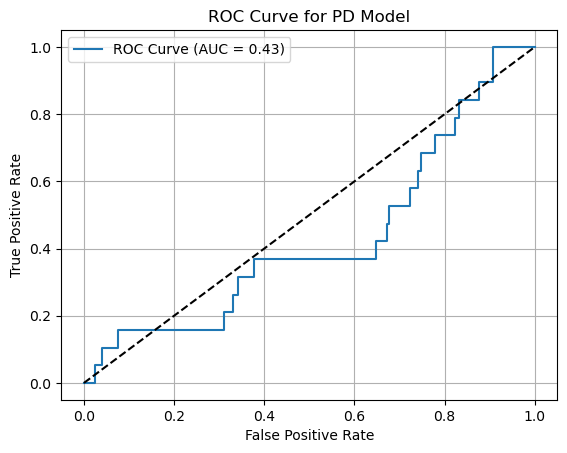

In [62]:
fpr, tpr, _ = roc_curve(y_test, y_probs)                  # Get False Positive Rate and True Positive Rate
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc_score(y_test, y_probs))  # Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')                           # Plot a diagonal reference line
plt.xlabel("False Positive Rate")                         # X-axis label
plt.ylabel("True Positive Rate")                          # Y-axis label
plt.title("ROC Curve for PD Model")                       # Title of the graph
plt.legend()                                              # Show legend
plt.grid(True)                                            # Add gridlines
plt.show()                                                # Display the plot